# Frame the picture
this dataset is fish market dataset, where we have to predict fish weight. Because the data is features and labels data so this is a supervised learning task. Its a regression task because here we are predict a value.  this is a multiple regression problem because we use multiple features to predict single value., There is no continuous flow of data comming in the system, there is no particular need to adjust to changing data rapidly and the data is small so plain batch learning is fine.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Get the data

In [2]:
def load_data(path):
    return pd.read_csv(path)

In [3]:
fish=load_data("C:\\Users\\Admin\\Documents\\Grrass\\Data Science\\ML\\projects\\Fish.csv")

In [4]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
fish.shape

(159, 7)

In [6]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


# Explore the data

In [8]:
fish_copy=fish.copy()

In [9]:
fish_copy.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [10]:
fish_copy.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


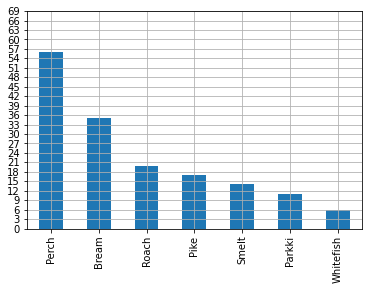

In [11]:
fish_copy['Species'].value_counts().plot(kind='bar')
plt.grid()
plt.yticks(range(0,70,3))
plt.show()

we analyse that there are Perch fish are high 56 while whitefish are only 6.

In [12]:
fish_copy['Species'].value_counts()/len(fish_copy['Species'])*100

Perch        35.220126
Bream        22.012579
Roach        12.578616
Pike         10.691824
Smelt         8.805031
Parkki        6.918239
Whitefish     3.773585
Name: Species, dtype: float64

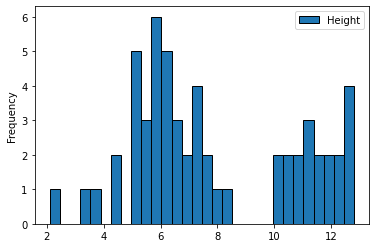

In [13]:
fish_copy[fish_copy['Species']=='Perch'][['Height']].plot(kind='hist', bins=30,ec='k')
plt.show()

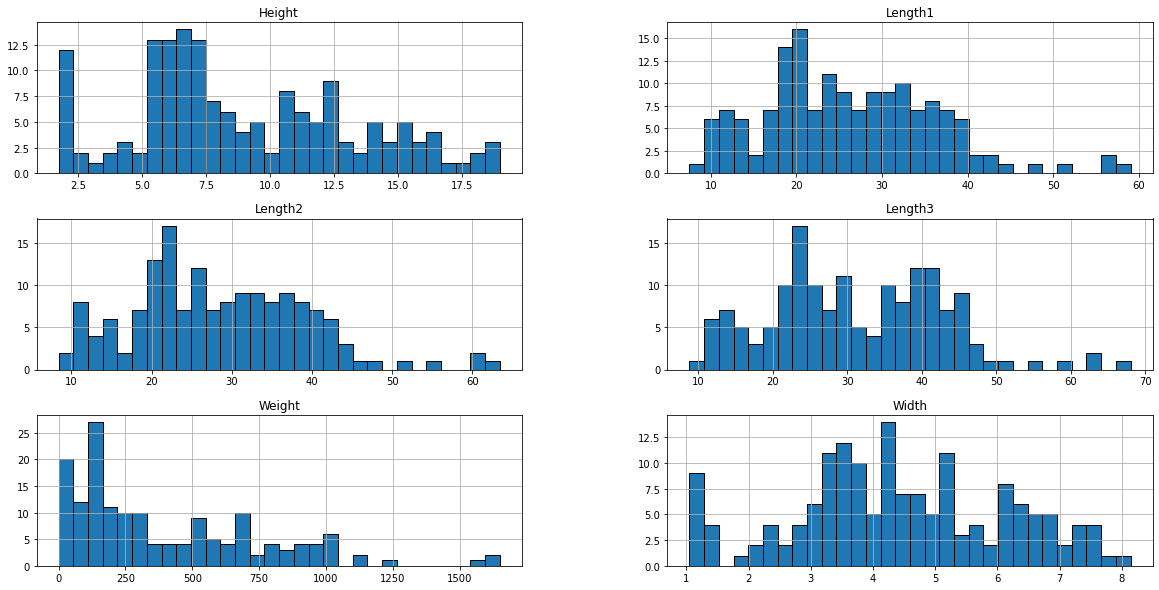

In [14]:
fish_copy.hist(bins=30, figsize=(20,10), ec='k')
plt.show()

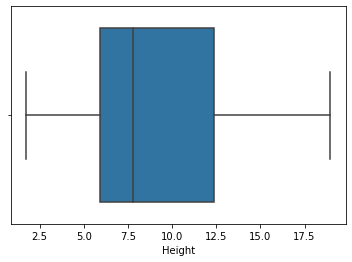

In [15]:
sns.boxplot('Height', data=fish_copy)
plt.show()

there is no outlier in height features

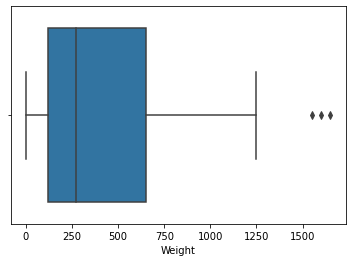

In [16]:
sns.boxplot('Weight', data=fish_copy)
plt.show()

This features has outliers

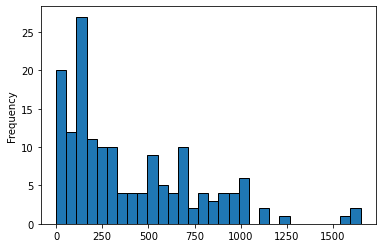

In [17]:
fish_copy['Weight'].plot(kind='hist', bins=30, ec='k')
plt.show()

maximum fish weight are less than 1000 but some fishes are higher weight

In [18]:
fish_copy.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


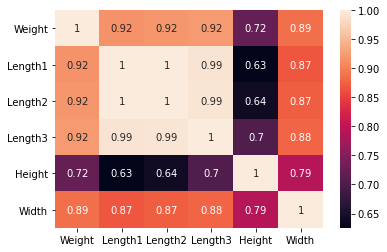

In [19]:
sns.heatmap(fish_copy.corr(),annot=True)
plt.show()

length1, length2, length3 has strong +ve correlation with weight. this is the case of multicollinearity.

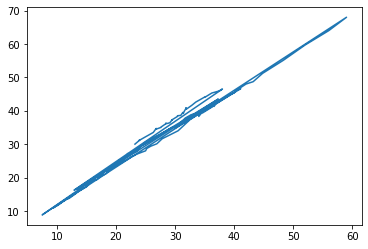

In [20]:
plt.plot('Length1','Length3', data=fish_copy)
plt.show()

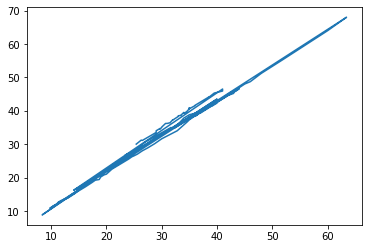

In [21]:
plt.plot('Length2','Length3', data=fish_copy)
plt.show()

both length1 and length2 gave same impact on length3 and length1,length2 have equal amount of correlation with target variable. so we can drop them

In [22]:
fish_copy=fish_copy.drop(['Length1', 'Length2'], axis=1)

In [23]:
fish_copy

,Species,Weight,Length3,Height,Width
0,Bream,242.0,30.0,11.5200,4.0200
1,Bream,290.0,31.2,12.4800,4.3056
2,Bream,340.0,31.1,12.3778,4.6961
3,Bream,363.0,33.5,12.7300,4.4555
4,Bream,430.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,Smelt,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.8,2.2770,1.2558
157,Smelt,19.7,15.2,2.8728,2.0672


In [24]:
fish_copy.corr()

,Weight,Length3,Height,Width
Weight,1.000000,0.923044,0.724345,0.886507
Length3,0.923044,1.000000,0.703409,0.878520
Height,0.724345,0.703409,1.000000,0.792881
Width,0.886507,0.878520,0.792881,1.000000


In [25]:
fish_copy['Length3'].value_counts().sort_values(ascending=False)

23.5    5
36.2    3
45.5    3
25.0    3
22.5    3
       ..
26.7    1
13.4    1
29.2    1
44.1    1
36.5    1
Name: Length3, Length: 124, dtype: int64

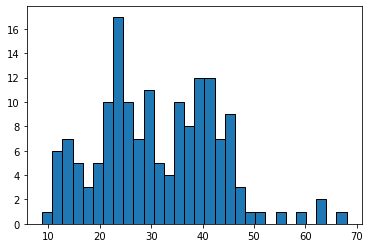

In [26]:
plt.hist(fish_copy['Length3'], bins=30, ec='k')
plt.show()

In [27]:
fish_copy['Length3'].value_counts()/len(fish_copy['Length3'])*100

23.5    3.144654
36.2    1.886792
45.5    1.886792
25.0    1.886792
22.5    1.886792
          ...   
45.8    0.628931
13.2    0.628931
20.8    0.628931
15.2    0.628931
30.0    0.628931
Name: Length3, Length: 124, dtype: float64

since the target variable has strong +ve correlation with Length features and this is continuous data so we can do stratified sampling here.

In [28]:
fish_copy['Length_3_cat']=pd.cut(fish_copy['Length3'], 
                                 bins=[0,15,30,45,60,75, np.inf], 
                                 labels=[1,2,3,4,5,6])


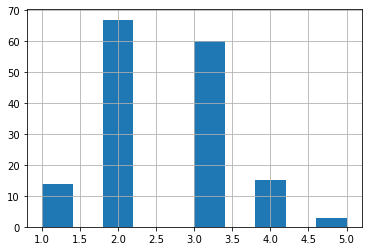

In [29]:
fish_copy['Length_3_cat'].hist()
plt.show()

In [30]:
fish_copy

,Species,Weight,Length3,Height,Width,Length_3_cat
0,Bream,242.0,30.0,11.5200,4.0200,2
1,Bream,290.0,31.2,12.4800,4.3056,3
2,Bream,340.0,31.1,12.3778,4.6961,3
3,Bream,363.0,33.5,12.7300,4.4555,3
4,Bream,430.0,34.0,12.4440,5.1340,3
...,...,...,...,...,...,...
154,Smelt,12.2,13.4,2.0904,1.3936,1
155,Smelt,13.4,13.5,2.4300,1.2690,1
156,Smelt,12.2,13.8,2.2770,1.2558,1
157,Smelt,19.7,15.2,2.8728,2.0672,2


In [31]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(fish_copy, fish_copy['Length_3_cat']):
    strat_train=fish_copy.loc[train_index]
    strat_test=fish_copy.loc[test_index]

In [32]:
strat_train.shape

(127, 6)

In [33]:
strat_test.shape

(32, 6)

In [34]:
from sklearn.model_selection import train_test_split
def proporations(data):
    return fish_copy['Length_3_cat'].value_counts()/len(fish_copy)
train,test=train_test_split(fish_copy,test_size=0.2, random_state=42)


In [35]:
prop=pd.DataFrame({
    "Overall":proporations(fish_copy),
    "Startified":proporations(strat_test),
    "Random": proporations(test),
    
})
prop["Random % error"]=prop['Random']/prop['Overall']*100-100
prop["Stratifies % error"]=prop['Startified']/prop['Overall']*100-100


In [36]:
prop

,Overall,Startified,Random,Random % error,Stratifies % error
2,0.421384,0.421384,0.421384,0.0,0.0
3,0.377358,0.377358,0.377358,0.0,0.0
4,0.094340,0.094340,0.094340,0.0,0.0
1,0.088050,0.088050,0.088050,0.0,0.0
5,0.018868,0.018868,0.018868,0.0,0.0
6,0.000000,0.000000,0.000000,NaN,NaN


# Prepare the Data

In [37]:
features=fish_copy.drop(['Weight', 'Length_3_cat'], axis=1)
label=fish_copy['Weight'].copy()

In [38]:
train_x, test_x, train_y, test_y=train_test_split(features, label,test_size=0.2, random_state=42 )


In [39]:
train_x.columns

Index(['Species', 'Length3', 'Height', 'Width'], dtype='object')

In [40]:
fish_num=['Length3','Height','Width']
fish_cat=['Species']

In [41]:
# import libraries for pipeline and scaling, encoding
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, ClassifierMixin

In [42]:
num_pipeline=Pipeline(
[
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

In [43]:
from sklearn.compose import ColumnTransformer

In [44]:
full_pipeline=ColumnTransformer([
    ("num",num_pipeline,fish_num),
    ("hot_cat",OneHotEncoder(handle_unknown="error"), fish_cat)
])

In [45]:
fish_tr=full_pipeline.fit_transform(train_x)

In [46]:
fish_tr=pd.DataFrame(fish_tr, columns=[*fish_num,'Perch','Bream','Roach','Pike', 'Smelt', 'Parkki','Whitefish' ])

In [47]:
fish_tr

,Length3,Height,Width,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
0,-1.220929,-1.062734,-1.104417,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.536085,-0.259441,0.270423,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.004342,0.891871,0.163613,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.669526,-0.681725,-0.627854,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.511983,-0.449896,-0.374310,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122,-0.188143,0.638351,-0.120212,0.0,1.0,0.0,0.0,0.0,0.0,0.0
123,-0.153133,-0.252311,-0.138516,0.0,0.0,1.0,0.0,0.0,0.0,0.0
124,0.529556,1.538754,0.455176,1.0,0.0,0.0,0.0,0.0,0.0,0.0
125,-0.625764,-0.510502,-0.494878,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Training the model
1. Linear Regression
2. Decision Tree
3. Random Forest

# Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [49]:
lin_reg=LinearRegression()

In [50]:
lin_reg.fit(fish_tr, train_y)

LinearRegression()

In [51]:
fish_pred=lin_reg.predict(fish_tr)

In [52]:
fish_pred[:5]

array([-79.82866832, 712.90677521, 337.94331119, 155.380441  ,
       166.63749735])

In [53]:
train_y.to_numpy()[:5]

array([ 51.5, 567. , 340. , 120. , 160. ])

In [54]:
# error
print('Mean Absolute Error : ', mean_absolute_error(train_y, fish_pred))
print('Mean Squared Error : ', mean_squared_error(train_y, fish_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_absolute_error(train_y, fish_pred)))

Mean Absolute Error :  68.58248049798446
Mean Squared Error :  8903.602495027162
Root Mean Squared Error:  8.281454008686184


In [55]:
from sklearn.metrics import r2_score
r2=r2_score(train_y, fish_pred)
print("Accuracy : ", round(r2*100,2))

Accuracy :  92.76


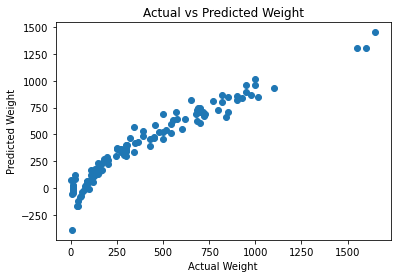

In [56]:
plt.scatter(train_y, fish_pred)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted Weight")
plt.show()

# Fine Tune your Model


In [60]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lin_reg,fish_tr, train_y, scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-score)
rmse_scores

array([ 94.58216473,  39.20638467,  86.54454534, 124.39775826,
       117.56869827,  86.63035813, 165.90951479, 146.75081588,
        66.51921244, 100.95967165])

In [58]:
def display_scores(score):
    print("Scores : ", score)
    print("Mean : ", score.mean())
    print("Standard Deviation : ", score.std())

In [59]:
display_scores(rmse_scores)

Scores :  [ 94.58216473  39.20638467  86.54454534 124.39775826 117.56869827
  86.63035813 165.90951479 146.75081588  66.51921244 100.95967165]
Mean :  102.90691241620058
Standard Deviation :  35.43445863568495


# Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
forest_reg=RandomForestRegressor()

In [63]:
forest_reg.fit(fish_tr, train_y)

RandomForestRegressor()

In [64]:
y_fpred=forest_reg.predict(fish_tr)

In [65]:
print("Error : ", np.sqrt(mean_squared_error(train_y, y_fpred)))

Error :  20.238025912750086


In [68]:
y_fpred[:5]

array([ 55.04, 546.8 , 328.41, 122.35, 158.81])

In [72]:
train_y[:5].to_numpy()

array([ 51.5, 567. , 340. , 120. , 160. ])

In [74]:
r2_forest=r2_score(train_y, y_fpred)
print("Accuracy: ", r2_forest)

Accuracy:  0.9966681556795127


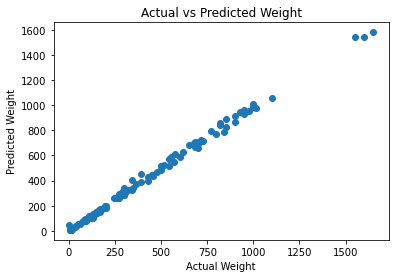

In [75]:
plt.scatter(train_y, y_fpred)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted Weight")
plt.show()

In [71]:
scores=cross_val_score(forest_reg, fish_tr, train_y, scoring="neg_mean_squared_error", cv=10)
scores=np.sqrt(-scores)
display_scores(scores)

Scores :  [ 34.64139784  36.57117292  38.49112716  73.45409353  51.65022028
  35.39859015 127.00647097  91.08908103  25.58913055  63.5932879 ]
Mean :  57.74845723402518
Standard Deviation :  30.188216892416797


# Hyperparameter Tuning

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [81]:
param={'n_estimators': randint(low=1, high=200), 
     'max_features': randint(low=1, high=8)}
forest_reg=RandomForestRegressor(random_state=42)
rand_search=RandomizedSearchCV(forest_reg, param_distributions=param, n_iter=10, cv=5, scoring="neg_mean_squared_error", random_state=42)
rand_search.fit(fish_tr, train_y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BE0D5A0250>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BE0F48F4C0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [83]:
curves=rand_search.cv_results_
for mean_score, params in zip(curves['mean_test_score'], curves['params']):
    print(np.sqrt(-mean_score), params)

69.47229889239935 {'max_features': 7, 'n_estimators': 180}
75.06488365027325 {'max_features': 5, 'n_estimators': 15}
72.97016807511628 {'max_features': 3, 'n_estimators': 72}
70.69775087410417 {'max_features': 5, 'n_estimators': 21}
70.37326807706609 {'max_features': 7, 'n_estimators': 122}
72.39918231657545 {'max_features': 3, 'n_estimators': 75}
72.91197310588143 {'max_features': 3, 'n_estimators': 88}
70.66704594071467 {'max_features': 5, 'n_estimators': 100}
72.95611557388399 {'max_features': 3, 'n_estimators': 150}
69.2121251882712 {'max_features': 5, 'n_estimators': 2}


In [84]:
from sklearn.model_selection import GridSearchCV

In [86]:
param_grid=[{
    'n_estimators':[3,10,30], 'max_features': [2,4,6,8]},
{ 'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]},]

In [89]:
forest_reg=RandomForestRegressor(random_state=42)
grid_search=GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

In [90]:
grid_search.fit(fish_tr, train_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [91]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [93]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=10,
                      random_state=42)

In [94]:
curves_grid=grid_search.cv_results_
for mean_score, params in zip(curves_grid['mean_test_score'], curves_grid["params"]):
    print(np.sqrt(-mean_score), params)

91.37831854158392 {'max_features': 2, 'n_estimators': 3}
78.72203473527306 {'max_features': 2, 'n_estimators': 10}
70.82031326037351 {'max_features': 2, 'n_estimators': 30}
80.13784363560141 {'max_features': 4, 'n_estimators': 3}
79.32052787004702 {'max_features': 4, 'n_estimators': 10}
77.57915713104116 {'max_features': 4, 'n_estimators': 30}
81.62873374609858 {'max_features': 6, 'n_estimators': 3}
66.5797052922285 {'max_features': 6, 'n_estimators': 10}
64.18567753099752 {'max_features': 6, 'n_estimators': 30}
109.22186255742402 {'max_features': 8, 'n_estimators': 3}
90.85541376562587 {'max_features': 8, 'n_estimators': 10}
74.65756387756925 {'max_features': 8, 'n_estimators': 30}
70.56354953327563 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
65.98770334236524 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
80.62437242371533 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
77.61833232703965 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

In [96]:
# features importance
fea_imp=grid_search.best_estimator_.feature_importances_
fea_imp

array([3.78781073e-01, 1.59344412e-01, 4.11881785e-01, 4.15723887e-03,
       3.73183803e-04, 3.22435997e-03, 3.34746273e-02, 6.65200640e-03,
       1.82770017e-03, 2.83613369e-04])

# Evaluate your system on the Test Set

In [98]:
final_model=grid_search.best_estimator_

In [102]:
test_x.columns

Index(['Species', 'Length3', 'Height', 'Width'], dtype='object')

In [106]:
test_x_prepared=full_pipeline.transform(test_x)

In [108]:
final_predictions=final_model.predict(test_x_prepared)

In [110]:
final_mse=mean_squared_error(test_y,final_predictions)
final_rmse=np.sqrt(final_mse)

In [111]:
final_rmse

67.34583777506224

In [113]:
from scipy import stats
confidence=0.95
squared_errors=(final_predictions-test_y)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([39.27313042, 86.76718826])

#### we could compute the interval manually like this:

In [114]:
m=len(squared_errors)
mean=squared_errors.mean()
tscore=stats.t.ppf((1+confidence)/2, df=m-1)
tmargin=tscore*squared_errors.std(ddof=1)/np.sqrt(m)
np.sqrt(mean-tmargin), np.sqrt(mean+tmargin)

(39.27313041631653, 86.76718826003867)

In [115]:
zscore=stats.norm.pdf((1+confidence)/2)
zmargin=zscore*squared_errors.std(ddof=1)/np.sqrt(m)
np.sqrt(mean-zmargin),np.sqrt(mean+zmargin)

(64.58701555250795, 69.99600812382158)